<a target="_blank" href="https://colab.research.google.com/github/ashkan-mokarian/d2l-pytorch/blob/main/chapter_multilayer_perceptrons/1_mlp.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
!pip install d2l==1.0.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.1 MB/s eta 0:00:00


In [4]:
import torch
import matplotlib.pyplot as plt
from d2l import torch as d2l

# Activation Functions for injecting non-linearity in DNN

## ReLU

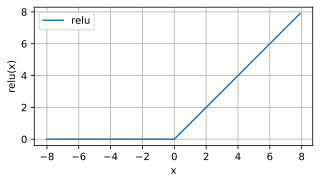

In [10]:
x = torch.arange(-8.0, 8, 0.1, requires_grad=True)
y = torch.relu(x)

from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')
plt.figure(figsize=(5, 2.5))
plt.plot(x.detach(), y.detach(), label='relu')
plt.xlabel('x'), plt.ylabel('relu(x)')
plt.grid()
_ = plt.legend()

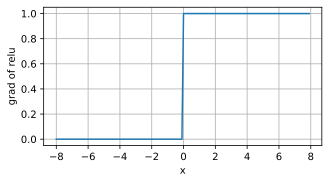

In [11]:
# Derivative of relu.
y.backward(gradient=torch.ones_like(x))
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

## Sigmoid

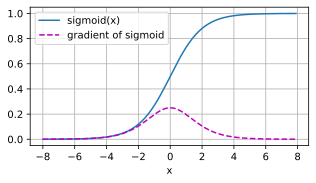

In [15]:
y = torch.sigmoid(x)
x.grad.zero_()
y.backward(gradient=torch.ones_like(x))
d2l.plot(x.detach(), [y.detach(), x.grad], 'x', legend=['sigmoid(x)', 'gradient of sigmoid'], figsize=(5, 2.5))

## tanh

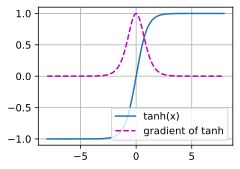

In [16]:
y = torch.tanh(x)
x.grad.zero_()
y.backward(gradient=torch.ones_like(x))
d2l.plot(x.detach(), [y.detach(), x.grad], legend=['tanh(x)', 'gradient of tanh'])

# MLP implementation from scratch
Here we use nn.Parameter. This automatically assigns a class attribute to be tracked by autograd

In [19]:
from torch import nn

In [26]:
def relu(X):
    return torch.max(torch.zeros_like(X), X)

class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_hiddens, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.normal(0, sigma, (num_inputs, num_hiddens)), requires_grad=True)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens), requires_grad=True)
        self.W2 = nn.Parameter(torch.normal(0, sigma, (num_hiddens, num_outputs)), requires_grad=True)
        self.b2 = nn.Parameter(torch.zeros(num_outputs), requires_grad=True)
    
    def forward(self, X):
        X = X.reshape((-1, self.num_inputs))
        out = torch.matmul(X, self.W1) + self.b1
        out = relu(out)
        return torch.matmul(out, self.W2) + self.b2

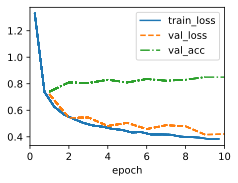

In [27]:
model = MLPScratch(num_inputs=784, num_hiddens=256, num_outputs=10, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

# Concise MLP implementation

In [32]:
class MLP(d2l.Classifier):
    def __init__(self, num_hiddens, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(num_hiddens),
            nn.ReLU(),
            nn.LazyLinear(num_outputs),
        )

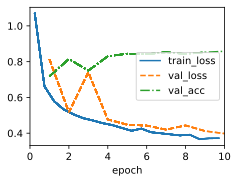

In [33]:
model = MLP(256, 10, 0.1)
trainer.fit(model, data)